In [91]:
from pathlib import Path
import os,os.path
import cv2
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from natsort import natsorted, ns
import random
from PIL import Image

In [110]:
source_img = './submit4/test/images/train'
source_label ='./submit4/test/labels/train'
ls_lab = os.listdir(source_label)
ls_img = os.listdir(source_img)
ls_lab = natsorted(ls_lab)
ls_img = natsorted(ls_img)
print('Total number of images and labels: ',len(ls_img),len(ls_lab))

Total number of images and labels:  2133 2133


In [16]:
def recude_size(img_path):

    image_path = source_img + '/' + img_path
    image_file = Image.open(image_path)

    image_file.save(image_path, quality=85)

In [22]:
#for i in ls_img[:1064]:
    #recude_size(i)

In [47]:
def YoloToCor(img_shape,x,y,w,h):
    ''' covert yolo format to coordinate'''
    dh, dw, _ = img_shape
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1
    return l,t,r,b

def CorToYolo(img_shape,l,t,r,b):
    dh, dw, _ = img_shape
    x = (l+r)/2.0 / dw
    y = (t+b)/2.0 / dh
    w = (r-l)/ dw
    h = (b-t)/ dh
    return x,y,w,h

In [26]:
def return_class_img(index):  # count labels one image
    cls_0 = 0
    cls_1 = 0
    cls_2 = 0
    with open(source_label + '/' +str(index),'r') as f:
      lines = f.readlines()
      for line in lines:
        cls = line.split()[0]
        cls = int(cls)
        if(cls == 0):
            cls_0+=1
        elif(cls == 1):
            cls_1+=1
        else:
            cls_2+=1
    
    return cls_0,cls_1,cls_2

In [6]:
#example
#return_class_img(3)

In [24]:
def return_class_folder(list_labels):
    cls_0 = 0
    cls_1 = 0
    cls_2 = 0
    for i in list_labels:
        cls_0_temp,cls_1_temp,cls_2_temp = return_class_img(i)
        cls_0 += cls_0_temp
        cls_1 += cls_1_temp
        cls_2 += cls_2_temp
    return cls_0,cls_1,cls_2

In [27]:
return_class_folder(ls_lab)

(1366, 1721, 593)

In [7]:
def return_class_img_str(i):
    cls_0 = 0
    cls_1 = 0
    cls_2 = 0
    with open(i,'r') as f:
      lines = f.readlines()
      for line in lines:
        cls = line.split()[0]
        cls = int(cls)
        if(cls == 0):
            cls_0+=1
        elif(cls == 1):
            cls_1+=1
        else:
            cls_2+=1
    
    return cls_0,cls_1,cls_2

In [36]:
def find_img_labels(label,list_labels):   # find img have label two 
    list_index = []
    for i in list_labels:
        cls_0_temp,cls_1_temp,cls_2_temp = return_class_img(i)
        if cls_2_temp != 0 or cls_0_temp !=0:
            list_index.append(i)
    return list_index

In [93]:
#find_img_labels(0,ls_lab)

In [31]:
#file_to_delete = find_img_labels(1,ls_lab)

In [33]:
#file_to_delete

In [105]:
## split vali
file_delete=random.sample(ls_lab[:1060],400)

In [28]:
def file_to_delete(list_labels):
    file =[]
    for i in list_labels:
        if sum(return_class_img(i)) == 0:
            file.append(i)
    return file

In [100]:
#file_delete = file_to_delete(ls_lab)
#file_delete
#file_delete = file_to_delete(ls_lab)
file_to_delete(ls_lab)

[]

In [106]:
del_img_lab = [os.path.join(source_label, name) for name in file_delete]
index_file_del = [os.path.splitext(name)[0] for name in file_delete]
del_img_img= [os.path.join(source_img, name) for name in index_file_del]
del_img_img = [name + '.jpg' for name in del_img_img]
del_img_img = [Path(name) for name in del_img_img]
del_img_lab  = [Path(name) for name in del_img_lab]

In [108]:
import shutil

for i in del_img_lab:
    shutil.move(str(i),'./submit4/test/labels/val')

In [52]:
#source_dir = Path('./submit2')
#ls_img = list((source_dir/ 'images' / 'train').glob('**/*.jpg'))
#ls_lab = list((source_dir / 'labels' / 'train').glob('**/*.txt'))

In [16]:
print(len(ls_img))
print(len(ls_lab))

1064
1065


In [41]:
list_img_incorect =  find_img_labels(1,ls_lab)

In [73]:
target_dir = Path('./submit4/argument2')
#seq = iaa.Sequential([
 #   iaa.Fliplr(p = 0.5),
  #  iaa.T
    #iaa.GaussianBlur(0.5),
    #iaa.LinearContrast(2.38),
    #iaa.MultiplyAndAddToBrightness(mul=1.5,add = 30),
    #iaa.PerspectiveTransform(0.05),
#])
sometimes = lambda aug: iaa.Sometimes(1, aug)
sometimes2 = lambda aug: iaa.Sometimes(0.05, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all image
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
         #   percent=(-0.10, 0.10),
          #  pad_mode="edge",
           # pad_cval=(0,255)
       # )),
        #sometimes(iaa.Affine(
            #scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}, # scale images to 80-120% of their size, individually per axis
            #translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)}, # translate by -20 to +20 percent (per axis)
            #rotate=(-5, 5), # rotate by -45 to +45 degrees
            #shear=(-5, 5), # shear by -16 to +16 degrees
            #order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            #cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            #mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        #)),
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0.25,0.5)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(1.1,1.5)), # blur image using local means with kernel sizes between 2 and 7
                #]),
                #iaa.Canny(alpha = 0.1),
                iaa.EdgeDetect(alpha=0.5), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask,
                #iaa.Invert(0.01, per_channel=True), # invert color channels
                #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.MultiplyAndAddToBrightness(mul=1.2,add = 10), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                #iaa.LinearContrast(alpha= 0.9, per_channel=0.5), # improve or worsen the contrast
                sometimes2(iaa.Grayscale(alpha=(0.0, 1.0))),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.03))), # sometimes move parts of the image around
                sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [44]:
ls_lab_argu = [os.path.join(source_label, name) for name in list_img_incorect]
index_file = [os.path.splitext(name)[0] for name in list_img_incorect]
ls_img_argu = [os.path.join(source_img, name) for name in index_file]
ls_img_argu = [name + '.jpg' for name in ls_img_argu]
ls_img_argu = [Path(name) for name in ls_img_argu]
ls_lab_argu = [Path(name) for name in ls_lab_argu]

In [45]:
print(len(ls_img_argu))
print(len(ls_lab_argu))

1412
1412


In [89]:
ls_img_argu[503]

PosixPath('submit4/test/images/train/1062.jpg')

In [90]:
idx = 0
source_dir ='./submit4'
for img,lab in zip(ls_img_argu[:504],ls_lab_argu[:504]):
    if img.stem != lab.stem:
        print('False')
        continue
    idx+=1
    if idx == len(list_img_incorect):
      break
    image = cv2.imread(str(img))
    with open(lab,'r') as f:
        lines = f.readlines()
    labels=[]
    bbs = BoundingBoxesOnImage([],shape=image.shape)
    for line in lines:
        cls,x,y,w,h = map(float,line.split())
        cls = int(cls)
        x1,y1,x2,y2 = YoloToCor(image.shape,x,y,w,h)
        labels.append((cls,x1,y1,x2,y2))
        bbs.bounding_boxes.append(BoundingBox(x1,y1,x2,y2,cls))
    image_aug,bbs_aug = seq(image = image,bounding_boxes=bbs)

    new_img_path = Path(target_dir,'images','au_version3_'+str(img.stem) + '.jpg')
    cv2.imwrite(str(new_img_path),image_aug)
    
    new_lab_path = Path(target_dir,'labels','au_version3_'+str(lab.stem) + '.txt')
    with open(new_lab_path,'w+') as f:
        for bb in bbs_aug.bounding_boxes:
            x1,y1,x2,y2,cls = bb.x1,bb.y1,bb.x2,bb.y2,bb.label
            x1,y1,x2,y2 = CorToYolo(image_aug.shape,x1,y1,x2,y2)
            f.write('{} {} {} {} {}\n'.format(cls,x1,y1,x2,y2))

In [8]:
def show_one_img(index):   #function show one image
    index_read = i -  1
    img = cv2.imread(source_img + ls_img[index_read])
    #print(source_img + ls_img[index_read])
    with open(source_label + ls_lab[index_read],'r') as f:
      lines = f.readlines()
    #print(lines)
    labels=[]
    bbs = BoundingBoxesOnImage([],shape=img.shape)
    for line in lines:
      cls,x,y,w,h = map(float,line.split())
      cls = int(cls)
      x1,y1,x2,y2 = YoloToCor(img.shape,x,y,w,h)
      labels.append((cls,x1,y1,x2,y2))
      bbs.bounding_boxes.append(BoundingBox(x1,y1,x2,y2,cls))
    #print(labels)
    plt.figure(figsize=(15,15))
    plt.title(str(labels) + "  " + source_img + ls_img[index_read] )
    plt.imshow(bbs.draw_on_image(img))
    

In [11]:
#start  = 100
#for i in range(start,start + 5 ): # show multi image
 #   pass
    #show_one_img(i)

./submit2/images/train/792.jpg
['1 0.212500 0.378472 0.070312 0.143056\n']
[(1, 227, 220, 316, 323)]


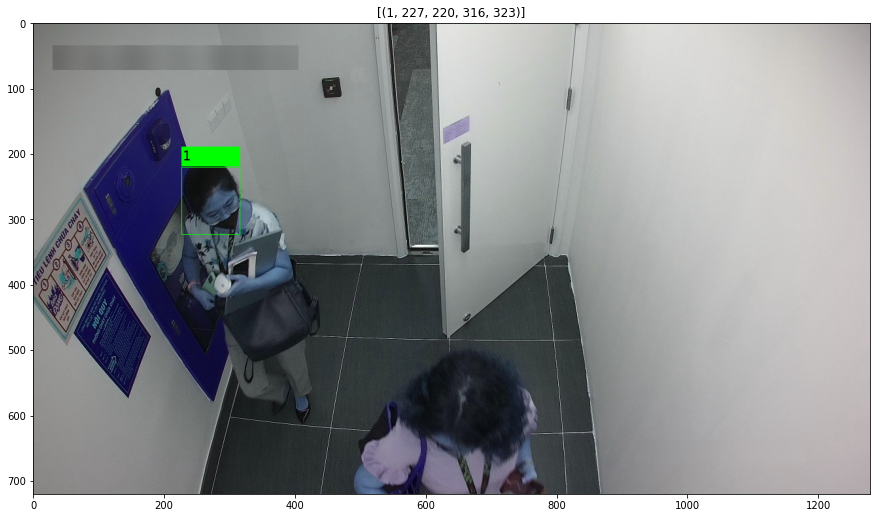

In [9]:
i = 792
index_read = i -  1
img = cv2.imread(source_img + ls_img[index_read])
print(source_img + ls_img[index_read])
with open(source_label + ls_lab[index_read],'r') as f:
  lines = f.readlines()
print(lines)
labels=[]
bbs = BoundingBoxesOnImage([],shape=img.shape)
for line in lines:
  cls,x,y,w,h = map(float,line.split())
  cls = int(cls)
  x1,y1,x2,y2 = YoloToCor(img.shape,x,y,w,h)
  labels.append((cls,x1,y1,x2,y2))
  bbs.bounding_boxes.append(BoundingBox(x1,y1,x2,y2,cls))
print(labels)
plt.figure(figsize=(15,15))
plt.title(labels)
plt.imshow(bbs.draw_on_image(img))
plt.show()